<a href="https://colab.research.google.com/github/Vishu26/Statistical-Communication-Labs/blob/master/LAB_2_Probability_Density_Function_(PDF)_Using_Histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

##Histogram
A histogram is an accurate representation of the distribution of numerical data.

Example: 
Data $x = [1,2,3,4,2,3,4,3,4,4]$

Number of bins $= 4$



<BarContainer object of 4 artists>

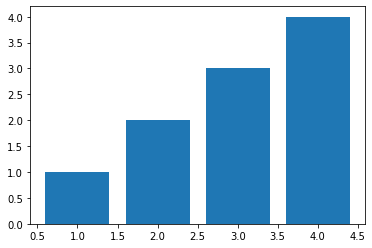

In [19]:
x = np.array([1,2,3,4,2,3,4,3,4,4])
bins = np.linspace(1,4,4)
freq = np.array([1,2,3,4])
no_samples = 10
plt.bar(bins,freq)

<BarContainer object of 4 artists>

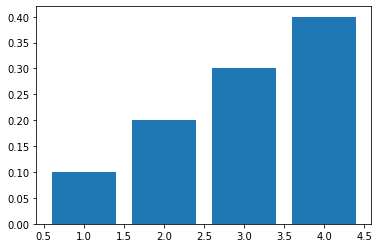

In [3]:
#PDF
plt.bar(bins,freq/(no_samples))

##<font color='red'>1.Create hist function to plot PDF.</font> 

In [0]:
def hist(x,no_bins):
  #write code here
  l = no_bins
  ma,mi = [max(x), min(x)]
  q = (ma - mi) / (l - 1)
  partition = np.arange(mi + q/2, ma + q, q)
  code_book = np.arange(mi, ma+q/2, q)
  freq = np.array([0]*l)
  for i in range(len(x)):
    for j in range(len(partition)):
      if x[i] < partition[j]:
        freq[j]+=1
        break
  plt.figure()
  plt.bar(code_book,freq/x.shape[0])
  return code_book,freq

(array([1., 2., 3., 4.]), array([1, 2, 3, 4]))

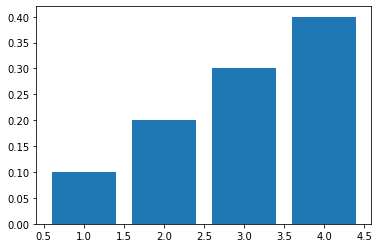

In [21]:
hist(x,4)

## Gaussian random variable
The probability density of the normal distribution is
$$f(x|\mu,\sigma)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{(x-\mu)^2}{2\sigma^2}}$$
where,

$\mu$  is the mean or expectation of the distribution (and also its median and mode),

$\sigma$  is the standard deviation, and

$\sigma ^{2}$ is the variance.

range of variable is approximately $\mu-3\sigma$ to $\mu+3\sigma$

##<font color='red'>2. Plot Gaussian PDF using above formula with $\mu=0$ and $\sigma=1$.</font> 

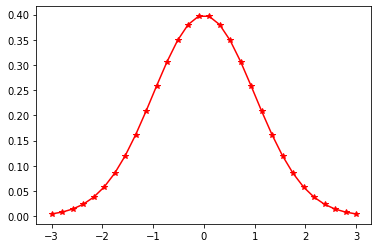

In [9]:
mu = 0
sigma = 1
x1 = np.linspace(-3, 3, 30)
var = 1 / np.sqrt(2*np.pi*sigma**2) * np.exp(-((x1 - mu)**2)/(2*sigma**2))
plt.plot(x1,var,'r-*')
plt.show()

###Draw random samples from a normal (Gaussian) distribution.
numpy.random.normal($\mu$, $\sigma$, number of samples)

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html

##<font color='red'>3. Genarate gaussian random variable (M=1000 samples) with $\mu=0$ and $\sigma=1$.  Plot the PDF using hist function and compare with PDF generated using above formula. Repeat for $\mu=4$ and $\sigma=4$. </font> 

[  2  12  44 133 234 246 194 106  25   4]


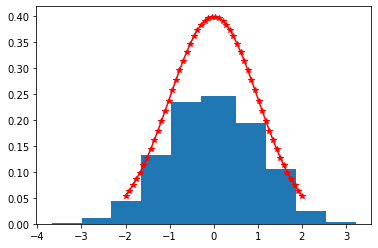

In [32]:
mu = 0
sigma = 1
M = 1000
no_bins = 10
x = np.random.normal(mu, sigma, M)
[bins,freq]=hist(x,no_bins)
print(freq)
x1 = np.linspace(-2, 2, 50)
var = 1 / np.sqrt(2*np.pi*sigma**2) * np.exp(-((x1 - mu)**2)/(2*sigma**2))
plt.plot(x1,var,'r-*')
#plt.plot(x1,mlab.normpdf(x1, mu, sigma),'r-*')
plt.show()


##<font color='red'>3. Plot CDF for above random variables. </font> 

In [0]:
#CDF
def CDF(bins,freq):
  cdf = np.zeros(bins.shape)
  cdf[0] = freq[0]
  for i in range(1, bins.shape[0]):
    cdf[i] = cdf[i-1] + freq[i]
  plt.figure()
  plt.plot(bins,cdf)
  plt.show()

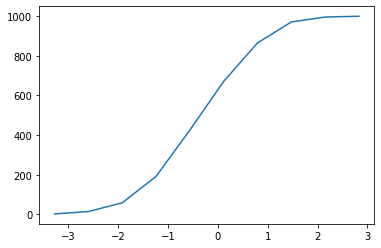

In [34]:
CDF(bins,freq)

##<font color='red'>4. For a random variable $X$ following normal distribution, show the PDF for a transformed random variable $X^2$. Find the mean and compare it with true mean. Use different values of M. </font> 

Mean of x is -0.003223
Mean of x^2 is 1.006035


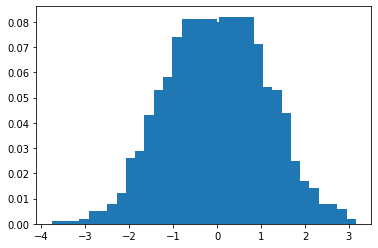

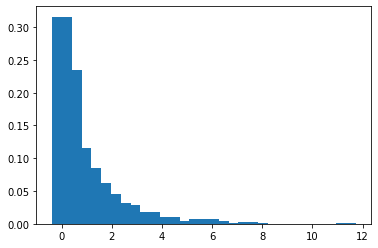

In [35]:
mu = 0
sigma = 1
M = 1000
no_bins = 30
x = np.random.normal(mu, sigma, M)

x2 = np.zeros(shape=(M))
x2 = x**2

[bins,freq]=hist(x,no_bins)    
[bins,freq]=hist(x2,no_bins)

print("Mean of x is %f"%(x.mean()))
print("Mean of x^2 is %f"%(x2.mean()))

## Uniform random variable
The probability density of the uniform distribution is
$$f(x|a,b)=\begin{cases}
    \frac{1}{b-a},& \text{if } a \leq x\leq b\\
    0,              & \text{otherwise}
\end{cases}$$


##Draw samples from a uniform distribution.
numpy.random.uniform(a,b,number of samples)

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.uniform.html

##<font color='red'>5. Genarate Uniform random variable with $a= 1$ and $b=2$. Plot the PDF and CDF.<font> 

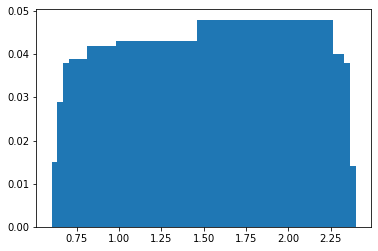

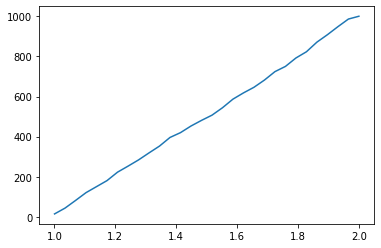

Mean of x_uniform is 1.511296
Variance of x_uniform is 0.085431


In [36]:
a=1
b=2
M = 1000
no_bins = 30
x_uniform = np.random.uniform(1, 2, M)
[bins,freq]=hist(x_uniform,no_bins)

#CDF
CDF(bins,freq)

print("Mean of x_uniform is %f"%(x_uniform.mean()))
print("Variance of x_uniform is %f"%(x_uniform.var()))


##<font color='red'>6. Consider the transformed random variable Y=pX+q, where X is uniform random variable between 1 and 2. Take p=4 and q=5 and plot PDF and CDF for Y. Also find the mean and variance of Y.</font> 

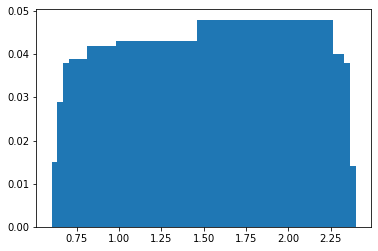

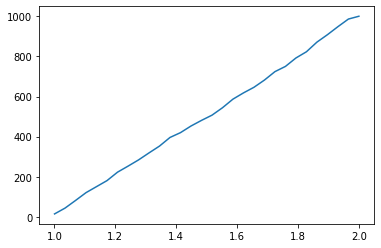

Mean of y is 11.045182
Variance of y is 1.366903


In [37]:

p = 4
q = 5
y = p*x_uniform+q

[bins,freq]=hist(x_uniform,no_bins)
CDF(bins,freq)
print("Mean of y is %f"%(y.mean()))
print("Variance of y is %f"%(y.var()))